In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from root_pandas import read_root
from matplotlib import rc
from numpy import inf

from AtlasCommonUtils import SetAtlasStyle
from ROOT import TLatex



rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)




#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

Welcome to JupyROOT 6.22/02


In [2]:
# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

In [3]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [4]:
def getJetData(inputFiles, isMC=False):
    
    cols = []
    scalar = []
    scalar.append('isBKG')
    scalar.append('polarization')
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')
    
    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    scalar.append('njets')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')
    scalar.append('gene_pt')
    
    cols.append('jet_p')
    cols.append('jet_pt')
    cols.append('jet_qt')
    cols.append('jet_dphi')
    cols.append('jet_z')
    cols.append('jet_eta')
    cols.append('jet_phi')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
        cols.append('genjet_p')
        cols.append('genjet_pt')
        cols.append('genjet_qt')
        cols.append('genjet_dphi')
        cols.append('genjet_z')

    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print ('\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds')
    return pd.concat([x for x in dataframes])

In [5]:
def getData(inputFiles, isMC=False):
    
    cols = []
    scalar = []  
    scalar.append('isBKG')
    scalar.append('polarization')

    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    
        
    scalar.append('x_e')
    scalar.append('y_e')
    scalar.append('Q2_e')

    scalar.append('e_eta')
    scalar.append('e_theta')
    scalar.append('e_p')
    scalar.append('e_pt')
    scalar.append('e_phi')
    scalar.append('gene_pt')

    scalar.append('vertex_z')
    scalar.append('ptratio')
    scalar.append('ptmiss')
    scalar.append('acoplanarity')
    scalar.append('Empz')
    scalar.append('njets')
    
    if(isMC):
        scalar.append('Weight')
        scalar.append('WeightGen')
    
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists+cols,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print ('\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds')
    return pd.concat([x for x in dataframes])

In [6]:
def applyCuts(df):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'x > 0.05', 'x>0.05')
    temp.eval('logQ2= log(Q2)/2.3025850', inplace=True)
    temp.eval('logx= log(x)/2.3025850', inplace=True)
    return temp

In [7]:
def applyCutsJets(df,isMC=False):
    temp = df
    temp = applyCut(temp, 'abs(vertex_z)<25 and vertex_z!=0','abs(vertex_z)<25 and and vertex_z!=0')
    temp = applyCut(temp, '0.2 < y < 0.7', '0.2 < y < 0.7')
    temp = applyCut(temp, 'Q2>150', 'Q2>150')
    temp = applyCut(temp, 'e_pt>15', 'e_pt >15')
    temp = applyCut(temp, 'jet_pt>10', 'jet_pt>10')
    temp = applyCut(temp, 'isBKG<1.0', 'isBKG')

    #temp = applyCut(temp, 'jet_qt<5', 'jet_qt<5')

    #temp = applyCut(temp, 'dphi_e_jet > 2.74', 'dphi_e_jet>3.14159-0.4')
    #temp = applyCut(temp, 'Q2>100.0', ' Q2>100.0')
    
    #temp.eval('dphi = 3.14159-jet_dphi', inplace=True)
    temp.eval('jet_qtnormjetpt= jet_qt/jet_pt', inplace=True)
    temp.eval('jet_qtnormept= jet_qt/e_pt', inplace=True)
    if(isMC):
        temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
        temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

## Get dataframes

In [8]:
df_jet      = applyCutsJets(getJetData(['data_echeme.root']))
mc_jet = applyCutsJets(getJetData(['rapgap.root'],isMC=True),isMC=True)
altmc_jet = applyCutsJets(getJetData(['djangoh.root'],isMC=True),isMC=True)


 Processed data_echeme.root in 1.9 seconds
abs(vertex_z)<25 and and vertex_z!=0 111629  fraction kept: 90.0
0.2 < y < 0.7 66449  fraction kept: 59.5
Q2>150 66449  fraction kept: 100.0
e_pt >15 24440  fraction kept: 36.8
jet_pt>10 22125  fraction kept: 90.5
isBKG 19278  fraction kept: 87.1

 Processed rapgap.root in 20.2 seconds
abs(vertex_z)<25 and and vertex_z!=0 958520  fraction kept: 96.7
0.2 < y < 0.7 677816  fraction kept: 70.7
Q2>150 677816  fraction kept: 100.0
e_pt >15 294734  fraction kept: 43.5
jet_pt>10 263459  fraction kept: 89.4
isBKG 235608  fraction kept: 89.4

 Processed djangoh.root in 18.6 seconds
abs(vertex_z)<25 and and vertex_z!=0 920853  fraction kept: 96.6
0.2 < y < 0.7 650115  fraction kept: 70.6
Q2>150 650115  fraction kept: 100.0
e_pt >15 271425  fraction kept: 41.8
jet_pt>10 239917  fraction kept: 88.4
isBKG 214401  fraction kept: 89.4


In [9]:
eptmin = 20
eptmax = 25

variable    = 'jet_dphi' 
genvariable = 'genjet_dphi'
namevariable = r'$\Delta\phi$'
minval = 2.5
maxval = np.pi
bins = np.linspace(2.5, np.pi, 20)


#variable    = 'jet_pt' 
#genvariable = 'genjet_pt'
#namevariable = r'$p_{T}$'
#minval = 5
#maxval = 30



data_cut = df_jet#.query('e_pt > %2.2f and e_pt<%2.2f '%(eptmin,eptmax))
mc_cut = mc_jet#.query('e_pt > %2.2f and e_pt<%2.2f '%(eptmin,eptmax))
altmc_cut = altmc_jet#.query('e_pt > %2.2f and e_pt<%2.2f'%(eptmin,eptmax))

<function matplotlib.pyplot.hist>

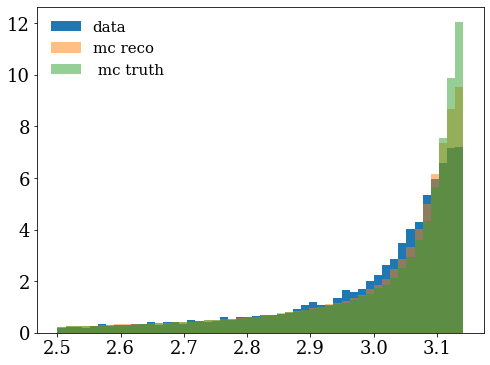

In [10]:
fig = plt.figure(figsize=(8,6))

plt.hist(data_cut[variable],range=(minval,maxval),bins=50, density=True,label='data')
plt.hist(mc_cut[variable],range=(minval,maxval),bins=50,density=True,alpha=0.5,label='mc reco')
plt.hist(mc_cut[genvariable],range=(minval,maxval),bins=50, density=True,alpha=0.5,label =' mc truth')
plt.legend(loc='best', frameon=False)
plt.hist

### Define UniFold Algorithm


In [11]:
from __future__ import absolute_import, division, print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
import keras.backend as K
from keras.layers import Dense, Input
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

2020-11-13 23:10:52.986452: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/miguel/anaconda3/envs/my_root_env/lib:
2020-11-13 23:10:52.986465: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Unifold

In [12]:
"""    Arguments:
                            
        iterations: number of iterations (integer)
        
        theta0_G: nominal generation-level observable as Numpy array
                    
        theta0_G: nominal simulation-level observable as Numpy array
                    
        theta_unknown_S: "natural" (unknown) simulation-level observable 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""


def unifold(iterations, theta0_G, theta0_S, theta_unknown_S):
    labels0 = np.zeros(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))

    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))

    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels_unknown))

    weights = np.empty(shape=(iterations, 2, len(theta0_G)))
    # shape = (iteration, step, event)

    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_G))

    inputs = Input((1, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                                  verbose=1,
                                  restore_best_weights=True)

    # from NN (DCTR)
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(weights)

    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))

        # STEP 1: classify Sim. (which is reweighted by weights_push) to Data
        # weights reweighted Sim. --> Data
        print("STEP 1\n")

        weights_1 = np.concatenate(
            (weights_push, np.ones(len(theta_unknown_S))))
        # actual weights for Sim., ones for Data

        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
            xvals_1, yvals_1, weights_1)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_1,
                  Y_train_1,
                  sample_weight=w_train_1,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_1, Y_test_1, w_test_1),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_pull = weights_push * reweight(theta0_S)
        weights[i, :1, :] = weights_pull

        # STEP 2: classify Gen. to reweighted Gen. (which is reweighted by weights_pull)
        # weights Gen. --> reweighted Gen.
        print("\nSTEP 2\n")

        weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for Gen., actual weights for (reweighted) Gen.

        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_2,
                  Y_train_2,
                  sample_weight=w_train_2,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_2, Y_test_2, w_test_2),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_push = reweight(theta0_G)
        weights[i, 1:2, :] = weights_pull

    return weights, model

In [13]:
#m_ll_0_G, m_ll_unknown_G, m_ll_0_S, m_ll_unknown_S = train_test_split(
#    Events.events['truth_m_ll'][mypass],
#    Events.events['m_ll'][mypass],
#    test_size=0.5)
dphi_0_G = mc_cut[genvariable][:200000]
dphi_0_S =mc_cut[variable][:200000]
dphi_unknown_G = altmc_cut[genvariable][:200000]
dphi_unknown_S = altmc_cut[variable][:200000]

In [14]:
ept_0_G = mc_cut['gene_pt'][:200000]
ept_0_S =mc_cut['e_pt'][:200000]
ept_unknown_G = altmc_cut['gene_pt'][:200000]
ept_unknown_S = altmc_cut['e_pt'][:200000]

/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


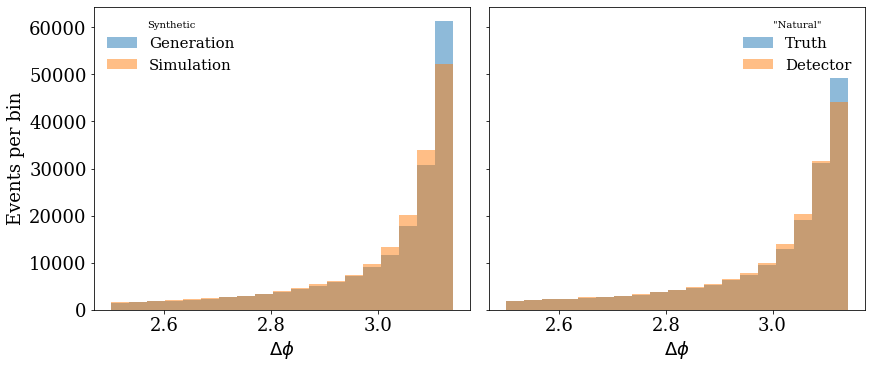

In [15]:
bins = np.linspace(2.5, np.pi, 20)

fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)
ax[0].set_xlabel(namevariable)
ax[0].set_ylabel('Events per bin')
hG0, _, _ = ax[0].hist(dphi_0_G, bins=bins, alpha=0.5, label='Generation')
hS0, _, _ = ax[0].hist(dphi_0_S, bins=bins, alpha=0.5, label='Simulation')
legend = ax[0].legend(title='Synthetic', loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel(namevariable)
hG1, _, _ = ax[1].hist(dphi_unknown_G, bins=bins, alpha=0.5, label='Truth')
hS1, _, _ = ax[1].hist(dphi_unknown_S, bins=bins, alpha=0.5, label='Detector')
legend = ax[1].legend(title='"Natural"', loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

# plt.ylim([0,1.5*np.max(np.concatenate((hG0, hG1, hS0, hS1)))])

fig.show()

/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


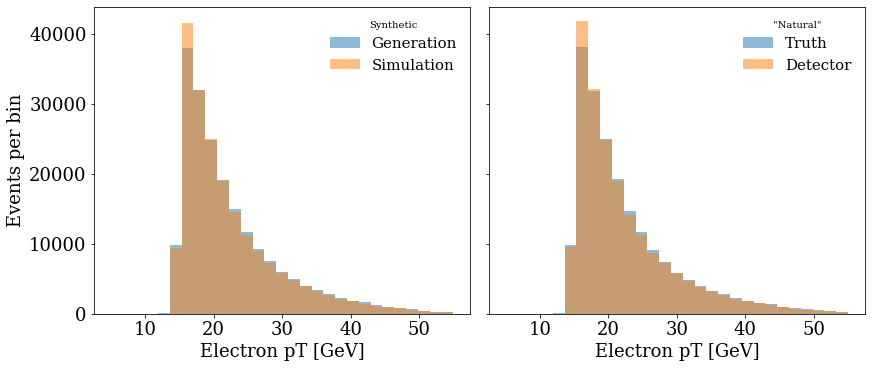

In [16]:
bins = np.linspace(5, 55, 30)
fig, ax = plt.subplots(1,
                       2,
                       figsize=(12, 5),
                       constrained_layout=True,
                       sharey=True)
ax[0].set_xlabel('Electron pT [GeV]')
ax[0].set_ylabel('Events per bin')
hG0, _, _ = ax[0].hist(ept_0_G, bins=bins, alpha=0.5, label='Generation')
hS0, _, _ = ax[0].hist(ept_0_S, bins=bins, alpha=0.5, label='Simulation')
legend = ax[0].legend(title='Synthetic', loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[1].set_xlabel('Electron pT [GeV]')
hG1, _, _ = ax[1].hist(ept_unknown_G, bins=bins, alpha=0.5, label='Truth')
hS1, _, _ = ax[1].hist(ept_unknown_S, bins=bins, alpha=0.5, label='Detector')
legend = ax[1].legend(title='"Natural"', loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

# plt.ylim([0,1.5*np.max(np.concatenate((hG0, hG1, hS0, hS1)))])

fig.show()

In [17]:

weights, _ = unifold(iterations=2,
                     theta0_G=dphi_0_G / 100.,
                     theta0_S=dphi_0_S / 100.,
                     theta_unknown_S=dphi_unknown_S / 100.)


ITERATION: 1

STEP 1

Epoch 1/200
30/30 [==============================] - 5s 182ms/step - loss: 0.6931 - accuracy: 0.5047 - val_loss: 0.6931 - val_accuracy: 0.5017
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5029 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 3/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6930 - val_accuracy: 0.5206
Epoch 4/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6930 - val_accuracy: 0.5087
Epoch 5/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6929 - val_accuracy: 0.5002
Epoch 6/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 7/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5082 - val_loss: 0.6927 - val_accur

30/30 [==============================] - 0s 3ms/step - loss: 0.6954 - accuracy: 0.5220 - val_loss: 0.6953 - val_accuracy: 0.5218
Epoch 00013: early stopping

STEP 2

Epoch 1/200
30/30 [==============================] - 6s 185ms/step - loss: 0.6914 - accuracy: 0.4996 - val_loss: 0.6908 - val_accuracy: 0.5010
Epoch 2/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6910 - accuracy: 0.4996 - val_loss: 0.6908 - val_accuracy: 0.5007
Epoch 3/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.4995 - val_loss: 0.6906 - val_accuracy: 0.5013
Epoch 4/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.4996 - val_loss: 0.6913 - val_accuracy: 0.5000
Epoch 5/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.4988 - val_loss: 0.6905 - val_accuracy: 0.5010
Epoch 6/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.4993 - val_loss: 0.6907 - val_acc

2020-11-13 23:10:55.543456: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-13 23:10:55.575277: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-13 23:10:55.576807: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 5000 computeCapability: 7.5
coreClock: 1.545GHz coreCount: 48 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 417.29GiB/s
2020-11-13 23:10:55.576985: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/miguel/anaconda3/envs/my_root_env/lib:
2020-11-13 23:10:55.577106: W tensorflow/stream_executor/platfor

ITERATION 1:


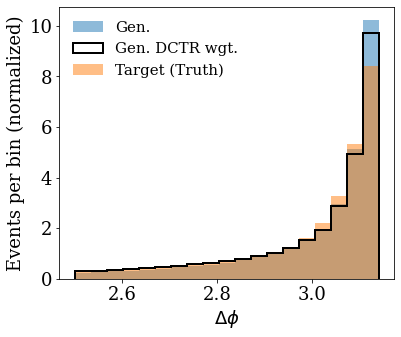

ITERATION 2:


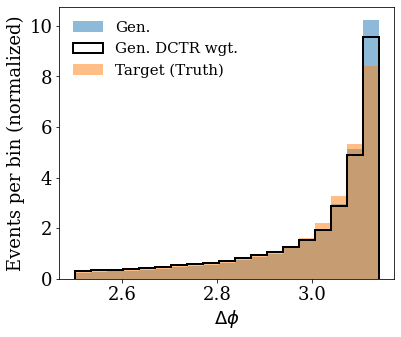

In [18]:
bins = np.linspace(2.5, np.pi, 20)

for i in range(len(weights)):
    print("ITERATION {}:".format(i + 1))
    plt.figure(figsize=(6, 5))
    hist0 = plt.hist(dphi_0_G, bins=bins, label=r'Gen.', **plot_style_2)

    hist1 = plt.hist(dphi_0_G,
                     bins=bins,
                     label='Gen. DCTR wgt.',
                     weights=weights[i, 1, :],
                     **plot_style_1)
    hist2 = plt.hist(dphi_unknown_G,
                     bins=bins,
                     label=r'Target (Truth)',
                     **plot_style_2)
    plt.legend(frameon=False)
    plt.xlabel(namevariable)
    plt.ylabel("Events per bin (normalized)")
    plt.show()

In [19]:

weights, _ = unifold(iterations=2,
                     theta0_G=ept_0_G / 100.,
                     theta0_S=ept_0_S / 100.,
                     theta_unknown_S=ept_unknown_S / 100.)


ITERATION: 1

STEP 1

Epoch 1/200
30/30 [==============================] - 6s 187ms/step - loss: 0.6932 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4996
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.4996
Epoch 3/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 4/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 5/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.4997 - val_loss: 0.6931 - val_accuracy: 0.4995
Epoch 6/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5009 - val_loss: 0.6931 - val_accuracy: 0.4998
Epoch 7/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5004 - val_loss: 0.6931 - val_accur

Epoch 00011: early stopping

STEP 2

Epoch 1/200
30/30 [==============================] - 5s 181ms/step - loss: 0.6924 - accuracy: 0.5001 - val_loss: 0.6924 - val_accuracy: 0.4983
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.4983 - val_loss: 0.6924 - val_accuracy: 0.4982
Epoch 3/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4989 - val_loss: 0.6924 - val_accuracy: 0.4990
Epoch 4/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5007 - val_loss: 0.6924 - val_accuracy: 0.4983
Epoch 5/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.5008 - val_loss: 0.6924 - val_accuracy: 0.4982
Epoch 6/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4999 - val_loss: 0.6924 - val_accuracy: 0.4998
Epoch 7/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.4990 - val_loss: 0.69

ITERATION 1:


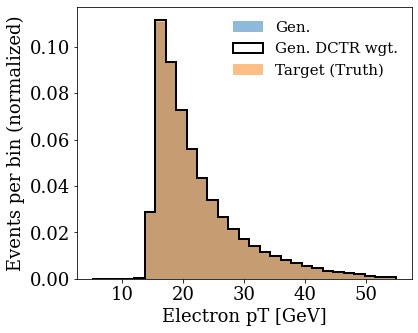

ITERATION 2:


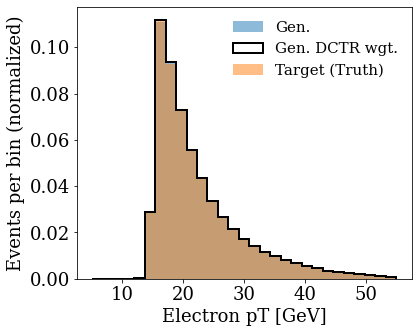

In [20]:
bins = np.linspace(5, 55, 30)

for i in range(len(weights)):
    print("ITERATION {}:".format(i + 1))
    plt.figure(figsize=(6, 5))
    hist0 = plt.hist(ept_0_G, bins=bins, label=r'Gen.', **plot_style_2)

    hist1 = plt.hist(ept_0_G,
                     bins=bins,
                     label='Gen. DCTR wgt.',
                     weights=weights[i, 1, :],
                     **plot_style_1)
    hist2 = plt.hist(ept_unknown_G,
                     bins=bins,
                     label=r'Target (Truth)',
                     **plot_style_2)
    plt.legend(frameon=False)
    plt.xlabel('Electron pT [GeV]')
    plt.ylabel("Events per bin (normalized)")
    plt.show()

## Multifold

In [21]:
K.clear_session()

/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


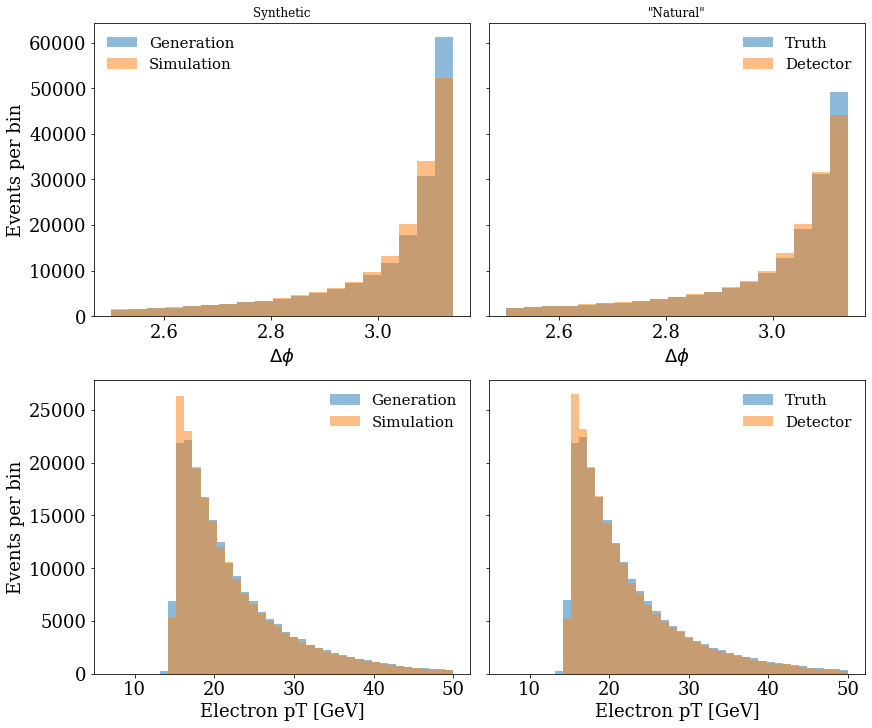

In [22]:
fig, ax = plt.subplots(2,
                       2,
                       figsize=(12, 10),
                       constrained_layout=True,
                       sharey='row')

bins = np.linspace(2.5, np.pi, 20)
## Define Multifold 
#bins = np.linspace(5, 50, 45)

ax[0, 0].set_title('Synthetic')
ax[0, 0].set_xlabel(namevariable)
ax[0, 0].set_ylabel('Events per bin')
hG0, _, _ = ax[0, 0].hist(dphi_0_G, bins=bins, alpha=0.5, label='Generation')
hS0, _, _ = ax[0, 0].hist(dphi_0_S, bins=bins, alpha=0.5, label='Simulation')
legend = ax[0, 0].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[0, 1].set_title('"Natural"')
ax[0, 1].set_xlabel(namevariable)
hG1, _, _ = ax[0, 1].hist(dphi_unknown_G, bins=bins, alpha=0.5, label='Truth')
hS1, _, _ = ax[0, 1].hist(dphi_unknown_S,
                          bins=bins,
                          alpha=0.5,
                          label='Detector')
legend = ax[0, 1].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')






bins = np.linspace(7, 50, 43)

ax[1, 0].set_xlabel('Electron pT [GeV]')
ax[1, 0].set_ylabel('Events per bin')
hG0, _, _ = ax[1, 0].hist(ept_0_G,
                          bins=bins,
                          alpha=0.5,
                          label='Generation')
hS0, _, _ = ax[1, 0].hist(ept_0_S,
                          bins=bins,
                          alpha=0.5,
                          label='Simulation')
legend = ax[1, 0].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

ax[1, 1].set_xlabel('Electron pT [GeV]')
hG1, _, _ = ax[1, 1].hist(ept_unknown_G,
                          bins=bins,
                          alpha=0.5,
                          label='Truth')
hS1, _, _ = ax[1, 1].hist(ept_unknown_S,
                          bins=bins,
                          alpha=0.5,
                          label='Detector')
legend = ax[1, 1].legend(loc='best', frameon=False)
plt.setp(legend.get_title(), multialignment='center')

# plt.ylim([0,1.5*np.max(np.concatenate((hG0, hG1, hS0, hS1)))])

fig.show()

## Define Multifold 

In [23]:
# Input multiple observables as tuple or list (i.e. theta0_G = (obs_1, obs_2, ...))
"""    Arguments:
        num_observables: number of observables to 
                            simultaneously unfold (integer)
                            
        iterations: number of iterations (integer)
        
        theta0_G: tuple or list of nominal 
                    generation-level observables as Numpy arrays
                    
        theta0_S: tuple or list of nominal 
                    simulation-level observables as Numpy arrays
                    
        theta_unknown_S: tuple or list of "natural" 
                            (unknown) simulation-level observables 
                            to be unfolded as Numpy arrays
        
        Returns:
        - A Numpy array of weights to reweight distributions in 
        theta0_G to the unfolded distribution of theta_unknown_S
        
        - The model used to calculate those weights
"""


def multifold(num_observables, iterations, theta0_G, theta0_S,
              theta_unknown_S):

    theta0_G = np.stack(theta0_G, axis=1)
    theta0_S = np.stack(theta0_S, axis=1)
    theta_unknown_S = np.stack(theta_unknown_S, axis=1)

    labels0 = np.zeros(len(theta0_G))
    labels_unknown = np.ones(len(theta_unknown_S))

    xvals_1 = np.concatenate((theta0_S, theta_unknown_S))
    yvals_1 = np.concatenate((labels0, labels_unknown))

    xvals_2 = np.concatenate((theta0_G, theta0_G))
    yvals_2 = np.concatenate((labels0, labels_unknown))

    weights = np.empty(shape=(iterations, 2, len(theta0_G)))
    # shape = (iteration, step, event)

    weights_pull = np.ones(len(theta0_S))
    weights_push = np.ones(len(theta0_G))

    inputs = Input((num_observables, ))
    hidden_layer_1 = Dense(50, activation='relu')(inputs)
    hidden_layer_2 = Dense(50, activation='relu')(hidden_layer_1)
    hidden_layer_3 = Dense(50, activation='relu')(hidden_layer_2)
    outputs = Dense(1, activation='sigmoid')(hidden_layer_3)

    model = Model(inputs=inputs, outputs=outputs)

    earlystopping = EarlyStopping(patience=10,
                                  verbose=1,
                                  restore_best_weights=True)

    # from NN (DCTR)
    def reweight(events):
        f = model.predict(events, batch_size=10000)
        weights = f / (1. - f)
        return np.squeeze(weights)

    for i in range(iterations):
        print("\nITERATION: {}\n".format(i + 1))

        # STEP 1: classify Sim. (which is reweighted by weights_push) to Data
        # weights reweighted Sim. --> Data
        print("STEP 1\n")

        weights_1 = np.concatenate(
            (weights_push, np.ones(len(theta_unknown_S))))
        # actual weights for Sim., ones for Data

        X_train_1, X_test_1, Y_train_1, Y_test_1, w_train_1, w_test_1 = train_test_split(
            xvals_1, yvals_1, weights_1)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_1,
                  Y_train_1,
                  sample_weight=w_train_1,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_1, Y_test_1, w_test_1),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_pull = weights_push * reweight(theta0_S)
        weights[i, :1, :] = weights_pull

        # STEP 2: classify Gen. to reweighted Gen. (which is reweighted by weights_pull)
        # weights Gen. --> reweighted Gen.
        print("\nSTEP 2\n")

        weights_2 = np.concatenate((np.ones(len(theta0_G)), weights_pull))
        # ones for Gen., actual weights for (reweighted) Gen.

        X_train_2, X_test_2, Y_train_2, Y_test_2, w_train_2, w_test_2 = train_test_split(
            xvals_2, yvals_2, weights_2)

        model.compile(loss='binary_crossentropy',
                      optimizer='Adam',
                      metrics=['accuracy'])
        model.fit(X_train_2,
                  Y_train_2,
                  sample_weight=w_train_2,
                  epochs=200,
                  batch_size=10000,
                  validation_data=(X_test_2, Y_test_2, w_test_2),
                  callbacks=[earlystopping],
                  verbose=1)

        weights_push = reweight(theta0_G)
        weights[i, 1:2, :] = weights_pull

    return weights, model

## Unfold two variables simultaneously

In [24]:
num_observables = 2

# simple / 100. standardization s.t. data is of order ~1

weights, _ = multifold(num_observables=num_observables,
                       iterations=2,
                       theta0_G=(dphi_0_G / 100., ept_0_G / 100.),
                       theta0_S=(dphi_0_S / 100., ept_0_S / 100.),
                       theta_unknown_S=(dphi_unknown_S / 100.,
                                        ept_unknown_S / 100.))


ITERATION: 1

STEP 1

Epoch 1/200
30/30 [==============================] - 5s 180ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5015
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5001 - val_loss: 0.6931 - val_accuracy: 0.4983
Epoch 3/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.4996
Epoch 4/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.4996
Epoch 5/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.5022
Epoch 6/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6931 - val_accuracy: 0.5031
Epoch 7/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5039 - val_loss: 0.6931 - val_accur

30/30 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.5238 - val_loss: 0.6915 - val_accuracy: 0.5226
Epoch 59/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5235 - val_loss: 0.6913 - val_accuracy: 0.5241
Epoch 60/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5236 - val_loss: 0.6913 - val_accuracy: 0.5242
Epoch 61/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5229 - val_loss: 0.6918 - val_accuracy: 0.5233
Epoch 62/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6916 - accuracy: 0.5227 - val_loss: 0.6916 - val_accuracy: 0.5228
Epoch 63/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6915 - accuracy: 0.5233 - val_loss: 0.6913 - val_accuracy: 0.5240
Epoch 64/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5239 - val_loss: 0.6913 - val_accuracy: 0.5246
Epoch 65/200
30/30 

30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5134 - val_loss: 0.6917 - val_accuracy: 0.5180
Epoch 12/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5147 - val_loss: 0.6918 - val_accuracy: 0.5190
Epoch 13/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5189 - val_loss: 0.6917 - val_accuracy: 0.5243
Epoch 14/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5187 - val_loss: 0.6918 - val_accuracy: 0.5017
Epoch 15/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5136 - val_loss: 0.6918 - val_accuracy: 0.4986
Epoch 16/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5117 - val_loss: 0.6917 - val_accuracy: 0.5038
Epoch 17/200
30/30 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.5151 - val_loss: 0.6918 - val_accuracy: 0.5055
Epoch 18/200
30/30 

ITERATION: 1


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


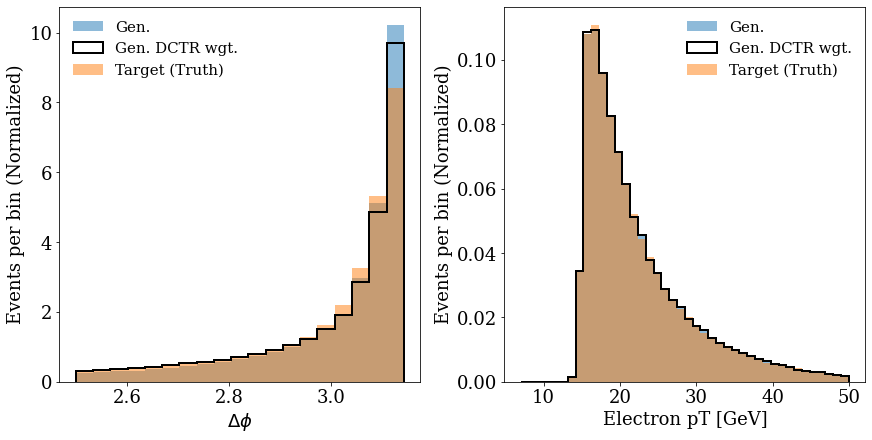

ITERATION: 2


/home/miguel/anaconda3/envs/my_root_env/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


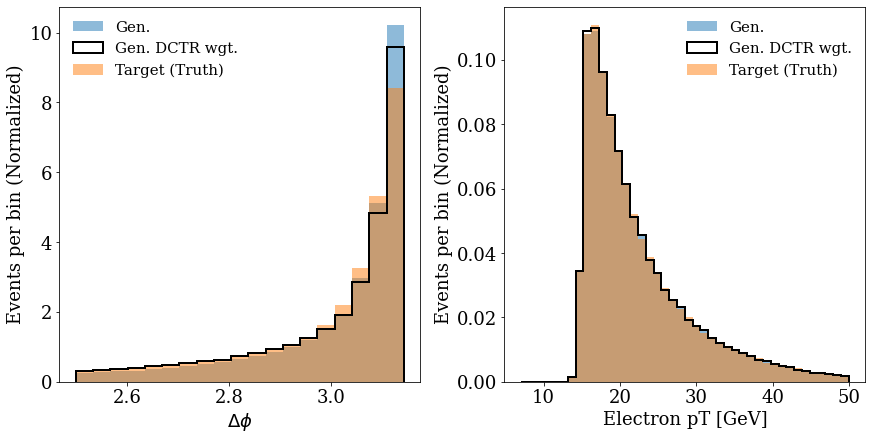

In [25]:
for i in range(len(weights)):

    print("ITERATION: {}".format(i + 1))
    bins = np.linspace(2.5, np.pi, 20)
    #bins = np.linspace(5, 50, 45)

    fig, ax = plt.subplots(1,
                           num_observables,
                           figsize=(12, 6),
                           constrained_layout=True)
    ax[0].set_xlabel(namevariable)
    ax[0].set_ylabel('Events per bin (Normalized)')
    ax[0].hist(dphi_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[0].hist(dphi_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)

    ax[0].hist(dphi_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    ax[0].legend(frameon=False)

    bins = np.linspace(7, 50, 43)

    ax[1].set_xlabel('Electron pT [GeV]')
    ax[1].set_ylabel('Events per bin (Normalized)')
    ax[1].hist(ept_0_G, bins=bins, label=r'Gen.', **plot_style_2)
    ax[1].hist(ept_0_G,
               bins=bins,
               weights=weights[i, 1, :],
               label=r'Gen. DCTR wgt.',
               **plot_style_1)
    ax[1].hist(ept_unknown_G,
               bins=bins,
               label=r'Target (Truth)',
               **plot_style_2)
    ax[1].legend(frameon=False)

    fig.show()
    plt.show()